# 피마 인디언 당뇨병 예측
- [22. 딥러닝 - 기본기 다지기] pdf p.10

In [3]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv(filename, header=None)
df.head()
# 0 : 과거 임신 횟수 1 : 포도당 부하 검사 2시간 후 공복 혈당 농도
# 2 : 확장기 혈압    3 : 삼두근 피부 주름 두께
# 4 : 혈청 인슐린    5 : 체질량 지수
# 6 : 당요병 가족력  7 : 나이

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

### 스케일 변환이 신경망 학습에 영향을 주는가?


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- 원본 데이터

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:,:-1], df.values[:,-1], stratify=df.values[:,-1], random_state=2022
)

In [13]:
model = Sequential([
    Dense(12, input_shape=(8,),activation ='relu'),
    Dense(8, activation ='relu'),
    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=200, batch_size=50, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.6823


[0.6301100254058838, 0.6822916865348816]

- 표준화 데이터

In [16]:
scaled = StandardScaler().fit_transform(df.values[:,:-1])
X_train2, X_test2, y_train, y_test = train_test_split(
    scaled, df.values[:,-1], stratify = df.values[:,-1], random_state = 2022
)

In [22]:
model2 = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(4, activation='relu'), # 24개의 아웃풋 층이니까 인풋은 없음
    Dense(1, activation='sigmoid') # 마지막 결과물이니까 activation = sigmoid
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 4)                 52        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [23]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model.fit(X_train2, y_train, validation_split=0.2,
                    epochs=200, batch_size=50, verbose=0)

In [24]:
model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 16.4619 - accuracy: 0.6562


[16.461883544921875, 0.65625]

In [27]:
import matplotlib.pyplot as plt


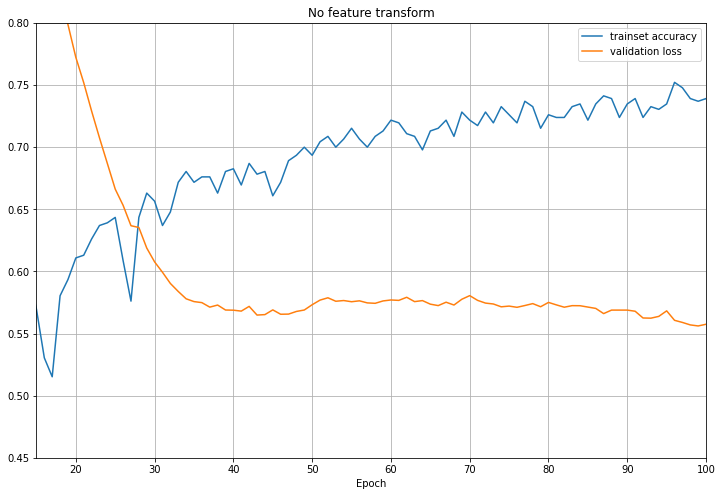

In [36]:
# 실전에서는 accuracy 값과 val_loss 값이 많이 그려짐
xs = np.arange(1,len(history.history['accuracy'])+1) 
plt.figure(figsize=(12,8))
plt.plot(xs, history.history['accuracy'], ms=10, label='trainset accuracy')
# trainset accuracy는 지속적으로 좋아지지만 validation loss는 특정 시점이 되면 더 나아지지 X
plt.plot(xs, history.history['val_loss'], ms=10, label='validation loss')
plt.legend()
plt.ylim(0.45,0.8)
plt.xlim(15,100)
plt.grid()
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [ ]:
# xs = np.arange(21,len(history.history['accuracy'])+1)        # epoch
# plt.figure(figsize=(12,8))
# plt.plot(xs, history.history['accuracy'][20:], ms=10, label='trainset accuracy')
# plt.plot(xs, history.history['val_loss'][20:], ms=10, label='validation loss')
# plt.legend()
# plt.grid()
# plt.xlabel('Epoch')
# plt.title('No feature transform')
# plt.show()
# ㅡㅡㅡㅡㅡ
# plt.figure(figsize=(12,8))
# plt.plot(xs, history2.history['accuracy'], ms=10, label='trainset accuracy')
# plt.plot(xs, history2.history['val_loss'], ms=10, label='validation loss')
# plt.legend()
# plt.grid()
# plt.xlabel('Epoch')
# plt.title('After feature transform')
# plt.show()